In [ ]:
import imutils
import cv2

class AspectAwarePreprocessor:
    def __init__(self, width, height, inter = cv2.INTER_AREA):
        
        self.width = width
        self.height = height
        self.inter = inter
        
        
    def preprocess(self, image):
        (h, w) = image.shape[:2]
        dW = 0
        dH = 0
        
        if w < h:
            image = imutils.resize(image, width=self.width, inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)
            
            
        else:
            image = imutils.resize(image, height=self.height, inter=self.inter)
            dW = int((image.shape[1] - self.width) / 2.0)
            
            
        (h, w) = image.shape[:2]
        image = image[dH:h - dH, dW:w - dW]
        
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)

In [1]:
import os

In [2]:
files = []
with open('datasets/17flowers/jpg/files.txt') as file:
    for line in file:
        files.append(line[:-1:])

In [5]:
classs=1
current = 'datasets/17flowers/jpg/'
moveto = 'datasets/updated_flower/'
temp=[]
temp.append(classs)
for file in files:
    if int(file[6:-4:])%17!=0:
        temp.append(file)
        
    else:
        temp.append(file)
        classs+=1
        temp.append(classs)

In [ ]:
for classs in range(1,81):
    classname = 'class' + str(classs)
    os.mkdir('datasets/updated_flower'+'/'+classname)

In [ ]:
import shutil

In [ ]:
current = 'datasets/17flowers/jpg/'
moveto = 'datasets/updated_flower/'
     

In [10]:
import shutil


In [9]:
for i in range(1,81):
    os.makedirs('datasets/updated_flower/'+'class'+str(i))

In [13]:
import shutil
classs=1
current = 'datasets/17flowers/jpg/'
moveto = 'datasets/updated_flower/'
for file in files:
    if int(file[6:-4:])%17!=0:
        src=current+file
        dst=moveto+'class'+str(classs)
        shutil.move(src,dst)
        
    else:
        src=current+file
        dst=moveto+'class'+str(classs)
        shutil.move(src,dst)
        classs+=1

Error: Destination path 'datasets/updated_flower/class1/image_0001.jpg' already exists

In [77]:
from imutils import paths

In [78]:
imagePaths = list(paths.list_images('datasets/updated_flower/'))

In [79]:
imagePaths

['datasets/updated_flower/class44/image_0735.jpg',
 'datasets/updated_flower/class44/image_0738.jpg',
 'datasets/updated_flower/class44/image_0734.jpg',
 'datasets/updated_flower/class44/image_0746.jpg',
 'datasets/updated_flower/class44/image_0748.jpg',
 'datasets/updated_flower/class44/image_0733.jpg',
 'datasets/updated_flower/class44/image_0743.jpg',
 'datasets/updated_flower/class44/image_0747.jpg',
 'datasets/updated_flower/class44/image_0745.jpg',
 'datasets/updated_flower/class44/image_0742.jpg',
 'datasets/updated_flower/class44/image_0737.jpg',
 'datasets/updated_flower/class44/image_0732.jpg',
 'datasets/updated_flower/class44/image_0744.jpg',
 'datasets/updated_flower/class44/image_0741.jpg',
 'datasets/updated_flower/class44/image_0736.jpg',
 'datasets/updated_flower/class44/image_0740.jpg',
 'datasets/updated_flower/class44/image_0739.jpg',
 'datasets/updated_flower/class50/image_0840.jpg',
 'datasets/updated_flower/class50/image_0848.jpg',
 'datasets/updated_flower/class

In [80]:
classNames = [pt.split(os.path.sep)[-2] for pt in imagePaths]

In [81]:
import numpy as np

In [82]:
classNames = [str(x) for x in np.unique(classNames)]

In [87]:
from DLWP.preprocessing.aspectawarepreprocessor import AspectAwarePreprocessor
from DLWP.preprocessing.imagetoarraypreprocessor import ImageToArrayPreprocessor
from DLWP.dataset.dataloader import DatasetLoader

In [88]:
aap = AspectAwarePreprocessor(64, 64)
iap = ImageToArrayPreprocessor()
sdl = DatasetLoader(preprocessors=[aap, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)

[INFO] processed 500/1360
[INFO] processed 1000/1360


In [94]:
data = np.array(data)

In [95]:
labels = np.array(labels)

In [96]:
data = data.astype("float")/255.0

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [99]:
from sklearn.preprocessing import LabelBinarizer
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [100]:
from keras.optimizers import SGD
from minivggnet import VggNet

In [101]:
print("[INFO] compiling model....")
opt = SGD(lr=0.05)
model = VggNet.load(width=64, height=64, depth=3, classes=len(classNames))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

[INFO] compiling model....


In [102]:
print("[INFO] training network......")
H = model.fit(trainX, testX, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] training network......


ValueError: Error when checking target: expected activation_30 to have 2 dimensions, but got array with shape (340, 64, 64, 3)

In [104]:
data.shape

(1360, 64, 64, 3)

In [105]:
from keras.preprocessing.image import ImageDataGenerator

In [107]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode='nearest')

In [108]:
model = VggNet.load(width=64, height=64, depth=3, classes=80)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [109]:
print("[INFO] training network.....")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),validation_data=(testX, testY), steps_per_epoch=len(trainX)//32,epochs=100, verbose=1)

[INFO] training network.....
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
31/31 [==============================] - 17s 557ms/step - loss: 4.3889 - acc: 0.0161 - val_loss: 4.3830 - val_acc: 0.0147
Epoch 2/100
31/31 [==============================] - 14s 443ms/step - loss: 4.3756 - acc: 0.0132 - val_loss: 4.3714 - val_acc: 0.0029
Epoch 3/100
31/31 [==============================] - 14s 442ms/step - loss: 4.3281 - acc: 0.0294 - val_loss: 4.2525 - val_acc: 0.0206
Epoch 4/100
31/31 [==============================] - 14s 438ms/step - loss: 4.2187 - acc: 0.0373 - val_loss: 4.2020 - val_acc: 0.0176
Epoch 5/100
31/31 [==============================] - 14s 441ms/step - loss: 4.2379 - acc: 0.0313 - val_loss: 4.3213 - val_acc: 0.0176
Epoch 6/100
31/31 [==============================] - 14s 437ms/step - loss: 4.2612 - acc: 0.0212 - val_loss: 4.2609 - val_acc: 0.0176
Epoch 7/100
31/31 [==============================] - 14s 436ms/step - los

31/31 [==============================] - 13s 420ms/step - loss: 2.7236 - acc: 0.2216 - val_loss: 3.2830 - val_acc: 0.1324
Epoch 60/100
31/31 [==============================] - 13s 420ms/step - loss: 2.7774 - acc: 0.2160 - val_loss: 3.2633 - val_acc: 0.1265
Epoch 61/100
31/31 [==============================] - 13s 421ms/step - loss: 2.8287 - acc: 0.2255 - val_loss: 3.4691 - val_acc: 0.0853
Epoch 62/100
31/31 [==============================] - 13s 420ms/step - loss: 2.6882 - acc: 0.2451 - val_loss: 3.0491 - val_acc: 0.1500
Epoch 63/100
31/31 [==============================] - 13s 420ms/step - loss: 2.6577 - acc: 0.2329 - val_loss: 3.0446 - val_acc: 0.1618
Epoch 64/100
31/31 [==============================] - 13s 420ms/step - loss: 2.6324 - acc: 0.2356 - val_loss: 3.1321 - val_acc: 0.1794
Epoch 65/100
31/31 [==============================] - 13s 421ms/step - loss: 2.6839 - acc: 0.2115 - val_loss: 2.9936 - val_acc: 0.1618
Epoch 66/100
31/31 [==============================] - 13s 422ms/step

In [113]:
from sklearn.metrics import classification_report

In [114]:
print("[INFO] evaluating network....")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=classNames))

[INFO] evaluating network....
              precision    recall  f1-score   support

      class1       0.00      0.00      0.00         7
     class10       0.00      0.00      0.00         3
     class11       0.14      0.33      0.20         3
     class12       0.25      0.25      0.25         4
     class13       0.50      0.14      0.22         7
     class14       0.00      0.00      0.00         1
     class15       0.00      0.00      0.00         3
     class16       0.00      0.00      0.00         3
     class17       0.50      0.50      0.50         2
     class18       0.00      0.00      0.00         2
     class19       0.00      0.00      0.00         8
      class2       0.00      0.00      0.00         1
     class20       0.00      0.00      0.00         2
     class21       0.00      0.00      0.00         3
     class22       0.00      0.00      0.00         6
     class23       0.18      1.00      0.31         2
     class24       0.00      0.00      0.00        

/home/aniket/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


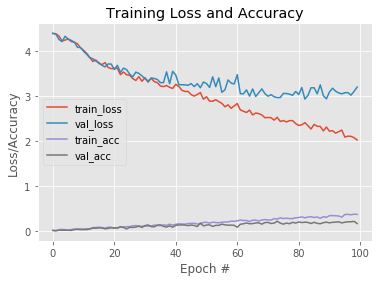

In [118]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [116]:
import matplotlib.pyplot as plt

In [117]:
%matplotlib inline
